# 00 - Jax fundamentals - Linear curve fitting

## Let's get started with jax. But first, numpy.

In [1]:
import numpy as np

In [2]:
print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


## Jax is really just numpy with superpowers, let's think of it that way for now.

In [3]:
import jax
import jax.numpy as jnp

In [4]:
jax.local_devices()

[GpuDevice(id=0, process_index=0)]

In [5]:
jax.__version__

'0.2.19'

In [6]:
print(jnp.arange(10))

[0 1 2 3 4 5 6 7 8 9]


### See how the results and the api from numpy and jax.numpy basically look the same.

## Now on to some numpy and jax usage for basic curve fitting.

### Let's first create a dataset using numpy.

In [7]:
import matplotlib.pyplot as plt

In [8]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=1, size=(100,))

original_weight = 7
original_bias = -5

ys = xs * original_weight + original_bias + noise

### Let's check what the dataset looks like

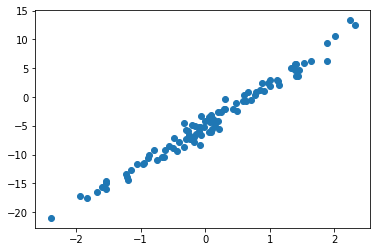

In [9]:
plt.scatter(xs, ys)

### Now we'll try to fit a linear model to the dataset using jax functions.

#### First, let's create a model function.

Note how we represent weight and bias together as theta.

In [10]:
def model(theta, x):
    weight, bias = theta
    return weight * x + bias

#### Then, we're on to a loss measurement function.

Note how me use jax.numpy mean instead of numpy mean.

In [11]:
def loss_fn(theta, x, y):
    prediction = model(theta, x)
    return jnp.mean((prediction - y)**2)

#### Finally, we need a function that can use the loss to update the weights & bias.


Here, we take a gradient on the loss function above, that does a jax transform on it and is then ready to apply the arguments as expected in the original loss function

In [12]:
def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)

#### Now, let's seed the weight and bias with a random number and start the fitting process.

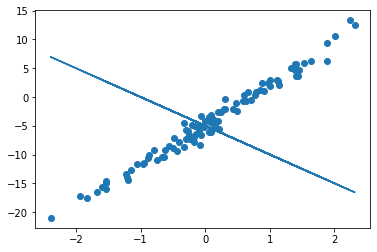

In [13]:
theta = jnp.array([-5., -5.])

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

That's where we started, not anywhere close to fit. Let's run the update function for some 5 iterations and see where we end up with our theta.

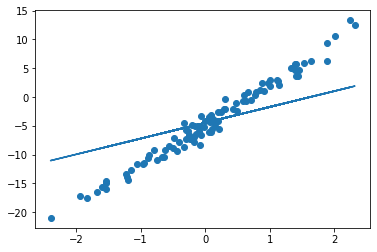

In [14]:
for _ in range(5):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

5 more iterations

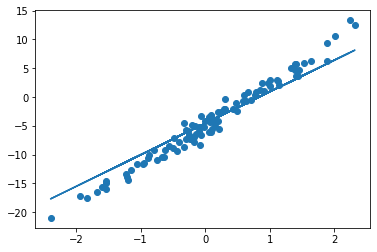

In [15]:
for _ in range(5):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

Getting there.

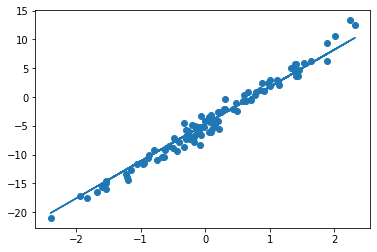

In [16]:
for _ in range(5):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

Let's go for 100 iterations now.

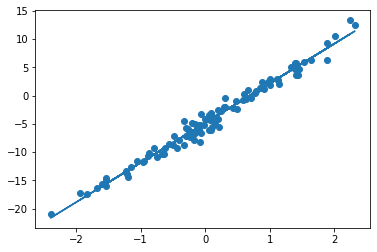

In [17]:
for _ in range(100):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

And, the final weight & bias is

In [18]:
w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

w: 7.02, b: -4.84


which is very close to what we got started with.

## That's all for today